In [1]:
import numpy as np                   # for multi-dimensional containers 
import pandas as pd                  # for DataFrames
import plotly.graph_objects as go    # for data visualisation
import plotly.io as pio              # to set shahin plot layout
import plotly.express as px
import os

In [19]:
pio.templates['covid'] = pio.to_templated(go.Figure().update_layout(
    legend=dict(orientation="h",y=1.1, x=.5, xanchor='center'),
    margin=dict(t=0,r=0,b=0,l=0))).layout.template
pio.templates.default = 'covid'


In [20]:
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)

In [21]:
type(mapbox_token)

str

In [22]:
data = pd.read_csv('../Resources/raw-us-states.csv')
data= data.dropna()
data.head()

,date,state,lat,long,cases,deaths
0,21/01/20,Alabama,32.318231,-86.902298,0.0,0.0
1,22/01/20,Alabama,32.318231,-86.902298,0.0,0.0
2,23/01/20,Alabama,32.318231,-86.902298,0.0,0.0
3,24/01/20,Alabama,32.318231,-86.902298,0.0,0.0
4,25/01/20,Alabama,32.318231,-86.902298,0.0,0.0


In [23]:
print(data.columns.values)

['date' 'state' 'lat' 'long' 'cases' 'deaths']


In [24]:
date_mask = data['date'] == data['date'].max()
date_mask

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6130    False
6131    False
6132    False
6133    False
6134    False
6135    False
6136    False
6137    False
6138    False
6139    False
6140    False
6141    False
6142    False
6143    False
6144    False
6145    False
6146    False
6147    False
6148    False
6149    False
6150    False
6151    False
6152    False
6153    False
6154    False
6155    False
6156    False
6157    False
6158    False
6159    False
Name: date, Length: 3810, dtype: bool

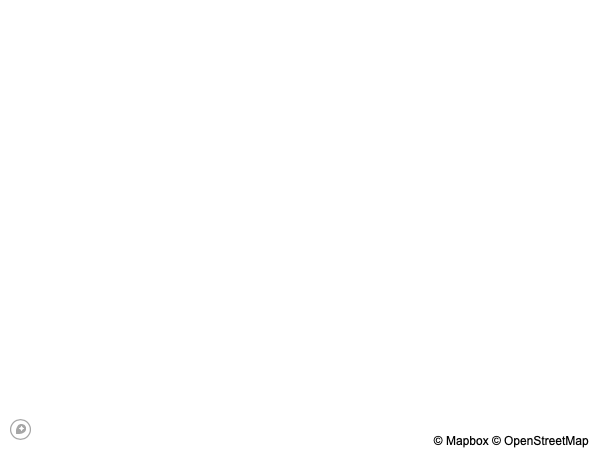

In [25]:
fig = px.scatter_mapbox(
    data[date_mask], lat="lat", lon="long",
    size="cases", size_max=50,
    color="deaths", color_continuous_scale=px.colors.sequential.Pinkyl,
    hover_name="state",           
    mapbox_style='dark', zoom=1
)
fig.layout.coloraxis.showscale = False
fig.show()

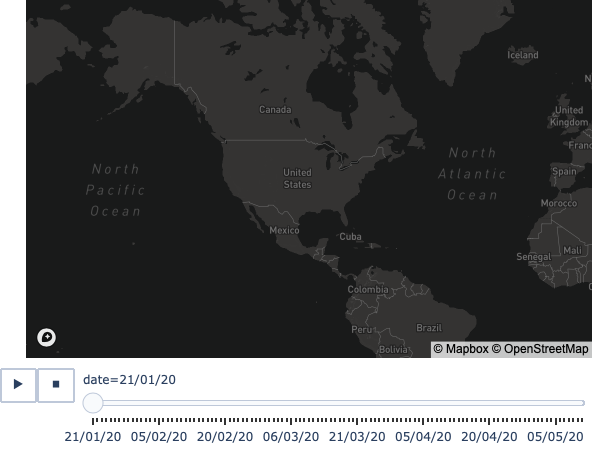

In [28]:
fig = px.scatter_mapbox(
    data, lat="lat", lon="long",
    size="cases", size_max=50,
    color="deaths", color_continuous_scale=px.colors.sequential.Pinkyl,
    hover_name="state",           
    mapbox_style='dark', zoom=1,
    animation_frame="date", animation_group="state"
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 100
fig.layout.coloraxis.showscale = False
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10
fig.show()